<a href="https://colab.research.google.com/github/diogoruivo47/Data-Mining/blob/main/final_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>
<a class="anchor" id="importlibraries">
    
# 2. Import libraries
    
</a>

In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

from scipy.stats import skewnorm

#scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


import math
from math import ceil

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

sns.set()

<hr>
<a class="anchor" id="importdataset">
    
# 3. Import Dataset
    
</a>

In [2]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

<hr>
<a class="anchor" id="initialpreprocessing">
    
# 4. Initial Pre-Processing
    
</a>

In [3]:
df.head(30)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
5,6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
6,8475ee66ef,2440,24.0,2,2,2,0.0,2,-,CARD,...,0,0,0,1,0,0,0,0,0,0
7,f2f53bcc67,8670,27.0,2,3,2,0.0,2,DISCOUNT,DIGI,...,0,1,0,0,0,0,0,0,0,0
8,5b650c89cc,2360,20.0,3,4,2,0.0,3,DISCOUNT,DIGI,...,0,0,0,1,0,1,0,0,0,1
9,84775a7237,8670,20.0,2,3,0,0.0,3,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,31888,31875,742ca068fc,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_region,31888,9,8670,9761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_age,31161.0,NaN,NaN,NaN,27.506499,7.160898,15.0,23.0,26.0,31.0,80.0
vendor_count,31888.0,NaN,NaN,NaN,3.102609,2.771587,0.0,1.0,2.0,4.0,41.0
product_count,31888.0,NaN,NaN,NaN,5.668245,6.957287,0.0,2.0,3.0,7.0,269.0
is_chain,31888.0,NaN,NaN,NaN,2.818866,3.977529,0.0,1.0,2.0,3.0,83.0
first_order,31782.0,NaN,NaN,NaN,28.478604,24.109086,0.0,7.0,22.0,45.0,90.0
last_order,31888.0,NaN,NaN,NaN,63.675521,23.226123,0.0,49.0,70.0,83.0,90.0
last_promo,31888,4,-,16748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,31888,3,CARD,20161,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<hr>
<a class="anchor" id="duplicatedrows">
    
## 4.1 Duplicated Rows
    
</a>

In [5]:
#costumer id should be a unique feature, as freq = 2, we know there are duplicates
duplicates_customer_id = df['customer_id'].groupby(df['customer_id']).size()[df['customer_id'].groupby(df['customer_id']).size() > 1]
duplicates_customer_id.count()

13

In [6]:
#check if only customer id is dulpicated, or the whole row
df.duplicated().sum() #not only the customer id, the whole row is duplicated, we should eliminate them

13

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum() #check

0

In [9]:
#after removing duplicate customer id's, we can drop the customer_id column and assume the index (1,2,3...) as their new id
df = df.iloc[0:, 1:56]

<hr>
<a class="anchor" id="fillemptycells">
    
## 4.2 Filling Empty Cells
    
</a>

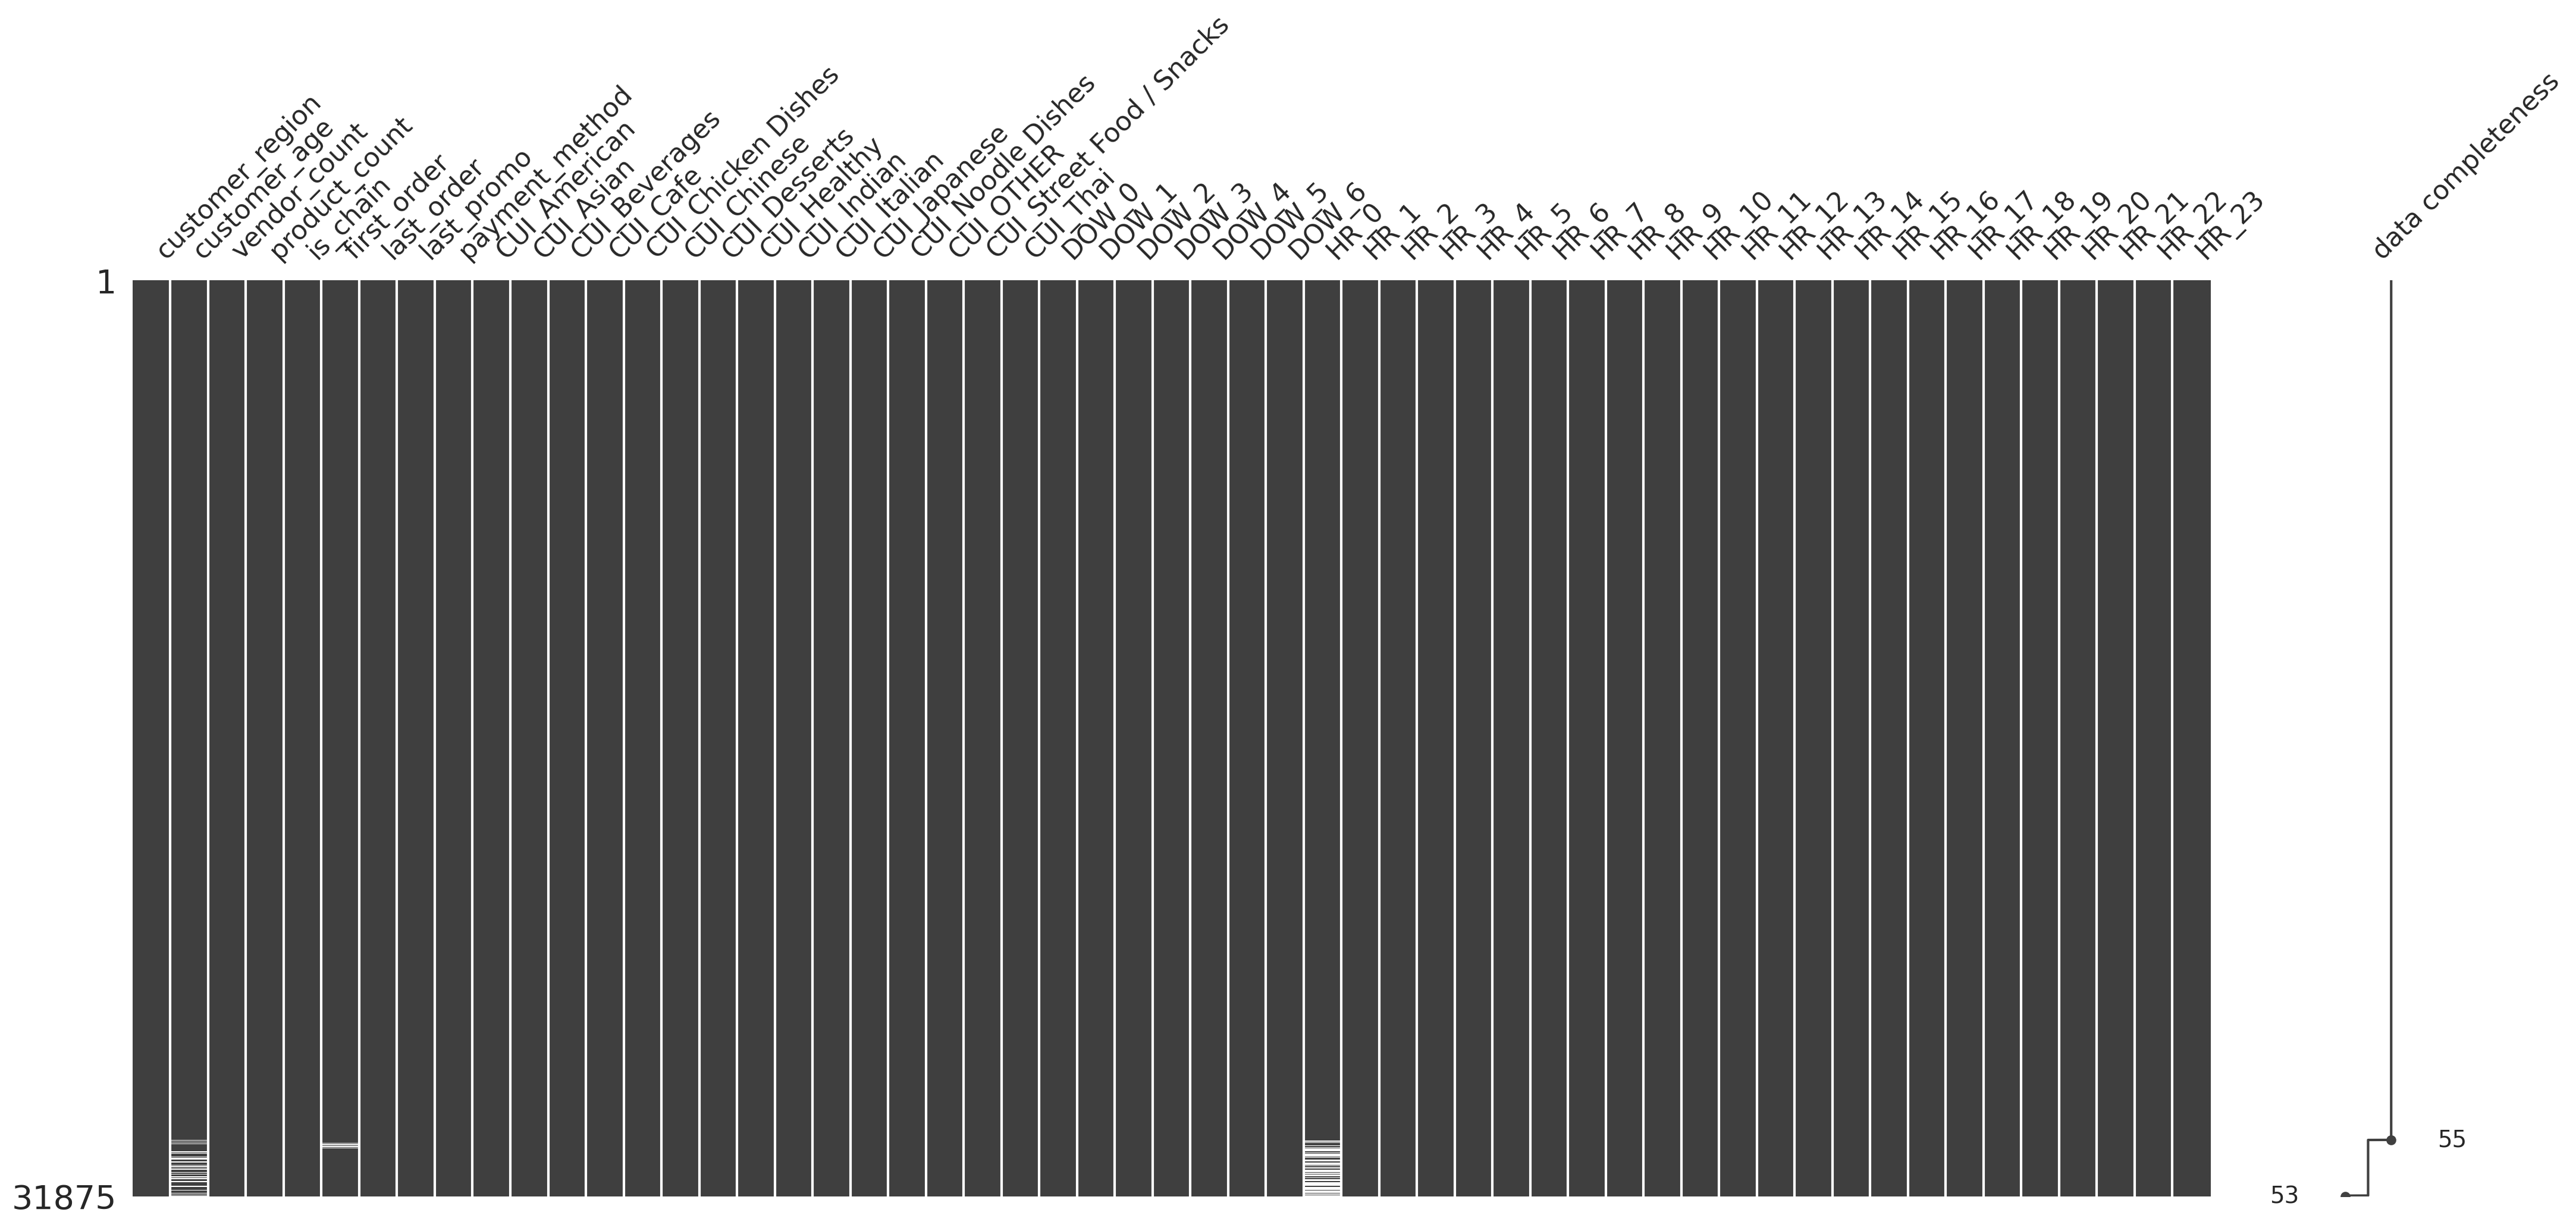

In [10]:
# Visualize the missing values in the dataset
msno.matrix(df, labels=True, sort="descending");

In [11]:
# Check the missing values in rows instead of columns
df.isnull().sum(axis=1).value_counts().sort_index(ascending=False)

,count
2,30
1,1937
0,29908


In [12]:
#there are 3 columns with NaN values, we will treat all of them as it is necessary for data visualization
df.isna().sum()

,0
customer_region,0
customer_age,727
vendor_count,0
product_count,0
is_chain,0
first_order,106
last_order,0
last_promo,0
payment_method,0
CUI_American,0


#### customer_Age

In [13]:
# Copy the data
df = df.copy(deep=True)                                  # deep=True to avoid the SettingWithCopyWarning

# Init the transformer
knn_imp = KNNImputer()                                               # k=5 is the default

# Fit/transform
df["customer_age"] = knn_imp.fit_transform(df[["customer_age"]])

# Check if KNN Imputer worked correctly
df.customer_age.describe()

## Time of Execution KNNImputer: 1.8s

,customer_age
count,31875.000000
mean,27.507545
std,7.079682
min,15.000000
25%,23.000000
50%,26.000000
75%,31.000000
max,80.000000


In [14]:
df.columns[df.isnull().sum()>0]


Index(['first_order', 'HR_0'], dtype='object')

#### first_order

In [15]:
# we suspect that NaNs for first_order just did their first_order today
print(df[df['first_order'].isna()]['last_order'].value_counts()) # as we can see all last_order is set to 0
print(df[df['first_order'].isna()]
      [['DOW_0','DOW_1','DOW_2','DOW_3','DOW_4','DOW_5','DOW_6']].value_counts())
# we can even see that the dataset was concluded on a sunday
# given this information, we will set these NaNs as the day next to the max value in the 'first_order' values

last_order
0    106
Name: count, dtype: int64
DOW_0  DOW_1  DOW_2  DOW_3  DOW_4  DOW_5  DOW_6
0      0      0      0      0      0      1        104
                                          2          2
Name: count, dtype: int64


In [16]:
# given this information, we will set these NaNs as the day next to the max value in the 'first_order' values
df['first_order'].max()

90.0

In [17]:
df['first_order'].fillna(91, inplace=True)

#### HR_0

In [18]:
# for HR_0
Total_Orders_Week = df.iloc[:, 24:31].sum(axis=1) #sum all DOW columns
Total_Orders_Hour = df.iloc[:, 32:].sum(axis=1) #sum all HR columns, dont count HR_0 as it is full of zeros
df['HR_0'] = Total_Orders_Week - Total_Orders_Hour

In [19]:
hourly_counts = {}

for hour in range(24):
    column_name = f'HR_{hour}'
    if column_name in df.columns:
        hourly_counts[column_name] = df[column_name].value_counts()

# Combine all hourly counts into a single DataFrame
combined_counts = pd.DataFrame(hourly_counts).fillna(0).astype(int)

# Calculate total counts for each hour
total_counts = combined_counts.sum()

# Add total counts as the first row
combined_counts = pd.concat([pd.DataFrame(total_counts, columns=['Total']).T, combined_counts])

# Sort the remaining rows (excluding the 'Total' row) in descending order
combined_counts.iloc[1:] = combined_counts.iloc[1:].sort_values(
    by=combined_counts.columns.tolist(), ascending=False
)

# Display the combined counts
print(combined_counts)

#check if values are in line with surrounding areas - they are
print(combined_counts.describe().transpose())

        HR_0   HR_1   HR_2   HR_3   HR_4   HR_5   HR_6   HR_7   HR_8   HR_9  \
Total  31875  31875  31875  31875  31875  31875  31875  31875  31875  31875   
0      30711  30592  30385  29354  29507  29849  30125  29982  28923  26952   
1        934   1016   1173   1783   1822   1615   1419   1541   2293   3557   
2        159    181    219    464    376    303    244    262    439    829   
3         39     46     60    163    101     63     59     54    114    280   
4         15     24     14     53     32     28     15     18     44    122   
5          8      7      8     26     18     15      7      5     27     59   
6          2      4      5     16      7      0      3      3     10     26   
7          2      1      1      1      1      0      0      1      2     13   
8          1      2      3      8      5      2      2      2     11     15   
9          1      1      4      2      3      0      1      3      2      8   
10         1      0      2      0      0      0     

In [20]:
# Check the missing values in rows again
df.isnull().sum(axis=1).value_counts().sort_index(ascending=False)

,count
0,31875


In [21]:
# We identified rows with 0s in vendor_count and product_count
zero_vendor = (df['vendor_count'] == 0).sum()
zero_product = (df['product_count'] == 0).sum()
print(f'Number of clients with 0 vendor_count: {zero_vendor}\nNumber of clients with 0 product_count: {zero_product}')

Number of clients with 0 vendor_count: 138
Number of clients with 0 product_count: 156


In [22]:
# Investigate the rows where 'product_count' has a value of 0
no_product = df.index[df['product_count'] == 0].tolist()
df.loc[no_product]
# There are rows where product_count == 0 even though the order has been placed

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
1449,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,0,0,0,0,0,0
1476,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,...,0,0,0,0,0,0,0,0,0,0
1488,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,0,0,0,0,0,0
2486,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,...,0,0,0,0,0,0,0,0,0,0
3391,8670,24.0,0,0,0,3.0,3,-,CASH,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31553,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,...,0,0,0,0,0,0,0,0,0,0
31667,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,...,0,0,0,0,0,0,0,0,0,0
31680,8670,20.0,0,0,0,89.0,89,DELIVERY,DIGI,0.0,...,0,0,0,0,0,0,0,0,0,0
31695,8670,25.0,0,0,1,89.0,89,-,CASH,0.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# We decided to delete these rows because having clients with no orders in the data set doesnt make sense
indexes = df.index[df['vendor_count'] == 0].tolist()
df = df.drop(index=indexes)
(df['vendor_count'] == 0).sum()

0

In [24]:
# For the missing product_count values we make an assumption that it is error in the data set
# If the vendor_count is different than 0, we will change the product_count to 1
df['product_count'] = df.apply(lambda row: 1 if row['product_count'] == 0 and row['vendor_count'] != 0 else row['product_count'], axis=1)

#Check if it worked
(df['product_count'] == 0).sum()

0

<hr>
<a class="anchor" id="redefiningvariables">
    
## 4.3 Redefining Variables
    
</a>

**Redefining DataTypes**

In [25]:
#age, first_order and HR_0 should be integers, the rest seems correct
df['customer_age'] = df['customer_age'].astype('int64')
df['first_order'] =df['first_order'].astype('int64')
df['HR_0'] =df['HR_0'].astype('int64')
df.dtypes

,0
customer_region,object
customer_age,int64
vendor_count,int64
product_count,int64
is_chain,int64
first_order,int64
last_order,int64
last_promo,object
payment_method,object
CUI_American,float64


**Redefining Names**

In [26]:
df.rename(columns={'CUI_Chicken Dishes': 'CUI_Chicken_Dishes'}, inplace=True)
df.rename(columns={'CUI_Noodle Dishes': 'CUI_Noodle_Dishes'}, inplace=True)
df.rename(columns={'CUI_Street Food / Snacks': 'CUI_Street_Food/Snacks'}, inplace=True)

**Redefining Variables**

##### last_order

In [27]:
df['last_order'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90,  9, 15,  0])

In [28]:
# there should not be 0 in last_order, it is due to the same reason for the missing values on first_order
print(df[df['last_order']  == 0]['first_order'].value_counts()) # the zeros appear on the day of the dataset snapshot

first_order
91    106
Name: count, dtype: int64


In [29]:
# we should just add 1 to the max of last_order for the rows that appear zero
df_last_order = df[['last_order']]
df_last_order[df_last_order == 0] = 91
df['last_order'] = df_last_order['last_order']
df.tail(10)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31878,8670,23,1,1,1,91,91,DELIVERY,CARD,0.00,...,0,0,0,0,0,0,0,0,0,0
31879,8670,24,1,1,0,91,91,DELIVERY,CARD,0.00,...,0,0,0,0,0,0,0,0,0,0
31880,4660,23,1,1,0,91,91,-,CARD,0.00,...,0,1,0,0,0,0,0,0,0,0
31881,8670,32,1,1,1,91,91,FREEBIE,CASH,0.00,...,0,0,0,0,0,0,0,0,0,0
31882,8670,21,1,1,1,91,91,DELIVERY,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
31883,8670,30,1,1,1,91,91,FREEBIE,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
31884,8670,27,1,1,0,91,91,DELIVERY,DIGI,18.04,...,0,0,1,0,0,0,0,0,0,0
31885,8670,24,1,1,1,91,91,-,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
31886,8670,34,1,1,0,91,91,DISCOUNT,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
31887,4660,30,1,1,0,91,91,-,CASH,0.00,...,0,0,1,0,0,0,0,0,0,0


<hr>
<a class="anchor" id="eda">
    
# 5.Exploratory Data Analysis
    
</a>

<hr>
<a class="anchor" id="datacategorization">
    
## 5.1 Data Categorization
    
</a>

***Days of The Week***

In [30]:
days_of_week = df[['DOW_0', 'DOW_1','DOW_2','DOW_3','DOW_4','DOW_5','DOW_6']]

***Hours of The Day***

In [31]:
hours_of_day = df[['HR_0','HR_1','HR_2','HR_3','HR_4','HR_5','HR_6','HR_7','HR_8','HR_9','HR_10','HR_11','HR_12','HR_13','HR_14','HR_15',
                   'HR_16','HR_17','HR_18','HR_19','HR_20','HR_21','HR_22','HR_23']]

***Cuisines***

In [32]:
cuisines = df[['CUI_Asian', 'CUI_American', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian'
               , 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes', 'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai']]

***Categorical Variables***

In [33]:
cat_variables = df[['customer_region', 'last_promo', 'payment_method']]

***Metric Variables***

In [34]:
#excluding hours and days
metric_variables = df[['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order']]
#including hours and days
numeric_df = df.select_dtypes(include=['int64', 'float64'])

#### Total Orders Per Client

In [35]:
df['Total_Orders_Per_Client'] = Total_Orders_Week

#### Total Spent Per Client

In [36]:
df['mnt'] = cuisines.sum(axis=1)

#### Amount Spent Per Order

In [37]:
df['mnt_Per_Order'] = (df['mnt']/df['Total_Orders_Per_Client']).round(2)

#### Amount of Items Per Order

In [38]:
df['Items_Per_Order'] = (df['product_count']/df['Total_Orders_Per_Client'])

#### Frequency

In [39]:
df['last_order'].max()

91

In [40]:
#i think we cannot calculate it like this
df['frq'] = (df['Total_Orders_Per_Client']/(df['last_order']-df['first_order']+1))

#### Recency

In [41]:
#we use 91 as the day for today
today = 91
df['rcn'] = today - df['last_order']

#### Activity

In [42]:
df['activity'] = df['last_order'] - df['first_order'] + 1

#### Cuisine Diversity Index

#### Loyalty

In [43]:
# we callculate loyalty score to understand clients preferences for vendors
df['Loyalty'] = (df['Total_Orders_Per_Client']-df['vendor_count'])/df['Total_Orders_Per_Client']

#### Time Periods

In [44]:
    # Time periods (4 hours each)
    time_periods = {
        'Night': ['HR_0', 'HR_1', 'HR_2', 'HR_3'],         # 12-4am
        'Dawn': ['HR_4', 'HR_5', 'HR_6', 'HR_7'],          # 4-8am
        'Morning': ['HR_8', 'HR_9', 'HR_10', 'HR_11'],     # 8am-12pm
        'Afternoon': ['HR_12', 'HR_13', 'HR_14', 'HR_15'], # 12-4pm
        'Evening': ['HR_16', 'HR_17', 'HR_18', 'HR_19'],   # 4-8pm
        'Dusk': ['HR_20', 'HR_21', 'HR_22', 'HR_23']       # 8pm-12am
    }

#### Age Groups

In [45]:
# Age grouping
age_bins = [0, 17, 24, 34, 44, 54, float('inf')]  # Use float('inf') for open-ended upper limit
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55+']
df['Age_Group'] = pd.cut(df['customer_age'], bins=age_bins, labels=age_labels)

#### CLV

In [46]:
    # CLV Score calculation
    recency_weight = 0.33
    frequency_weight = 0.33
    monetary_weight = 0.33

    # Normalize each component
    df['Recency_Score'] = 1 / (1 + df['rcn'])  # Higher score for more recent orders
    df['Frequency_Score'] = df['frq'] / df['frq'].max()
    df['Monetary_Score'] = df['mnt'] / df['mnt'].max()

    # Composite CLV score
    df['CLV_Score'] = (
        recency_weight * df['Recency_Score'] +
        frequency_weight * df['Frequency_Score'] +
        monetary_weight * df['Monetary_Score']
    )

<hr>
<a class="anchor" id="newfeatureanal">
    
## 5.4 New Feature Analysis
    
</a>

In [47]:
new_variables = ['Loyalty', 'activity', 'rcn', 'frq', 'Items_Per_Order', 'Total_Orders_Per_Client', 'mnt_Per_Order', 'mnt']
df[new_variables].describe()

,Loyalty,activity,rcn,frq,Items_Per_Order,Total_Orders_Per_Client,mnt_Per_Order,mnt
count,31737.000000,31737.00000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000
mean,0.161804,36.45061,26.941015,0.354685,1.299464,4.388033,10.305976,38.462376
std,0.229567,29.40898,22.939355,0.414692,0.417393,5.087637,7.862201,46.442549
min,0.000000,1.00000,0.000000,0.022222,1.000000,1.000000,0.370000,0.370000
25%,0.000000,4.00000,8.000000,0.076923,1.000000,2.000000,5.070000,13.020000
50%,0.000000,35.00000,20.000000,0.134328,1.166667,3.000000,8.220000,24.200000
75%,0.333333,63.00000,41.000000,0.600000,1.500000,5.000000,12.920000,45.180000
max,0.973333,91.00000,90.000000,4.000000,6.000000,94.000000,104.320000,1418.330000


<hr>
<a class="anchor" id="preprocessing">
    
# 6. Pre-Processing
    
</a>

<hr>
<a class="anchor" id="noutliers">
    
## 6.1 Outliers

In [48]:
features_to_win = ["vendor_count", "product_count", "is_chain", "Total_Orders_Per_Client", "mnt", "mnt_Per_Order",
                "Items_Per_Order", "frq", "rcn", "activity", "Loyalty", "Recency_Score", "Frequency_Score",
                "Monetary_Score", "CLV_Score"]

In [49]:
# Modified Winsorization Function
def winsorize_upper(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    # Compute the upper whisker
    upper_bound = q3 + (1.5 * iqr)
    # Apply trimming only above the upper whisker
    data[data > upper_bound] = upper_bound
    return np.where(data > upper_bound, upper_bound, data)  # Cap values above the upper bound

# Winsorization
def winsorize(data, p=0.01):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    data[data < lower_bound] = lower_bound
    data[data > upper_bound] = upper_bound
    return data

# Truncation
def truncate(data, p=0.95):
    threshold = np.percentile(data, p)
    data[data > threshold] = threshold
    return data

def treat_outliers(data):

    data = winsorize(data, p=0.01)

    #data = truncate(data, p=0.95)

    return data


In [50]:
# Apply winsorization
for col in features_to_win:
    df[col] = winsorize_upper(df[col].values)

df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score
count,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,...,31737.000000,31737.000000,31737.000000,31737.000000,31737.00000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000
mean,27.497842,2.918581,4.932445,2.252891,28.608375,64.058985,4.898412,9.998594,2.308218,0.804975,...,9.844285,1.283130,0.347879,26.941015,36.45061,0.161565,0.079498,0.086970,0.023455,0.066017
std,7.080691,2.035818,3.931106,1.952278,24.302594,22.939355,11.667887,23.603496,8.492919,6.442166,...,6.222479,0.350075,0.390181,22.939355,29.40898,0.228829,0.072992,0.097545,0.018850,0.040343
min,15.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.370000,1.000000,0.022222,0.000000,1.00000,0.000000,0.010989,0.005556,0.000261,0.011496
25%,23.000000,1.000000,2.000000,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,...,5.070000,1.000000,0.076923,8.000000,4.00000,0.000000,0.023810,0.019231,0.009180,0.030806
50%,26.000000,2.000000,3.000000,2.000000,22.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,8.220000,1.166667,0.134328,20.000000,35.00000,0.000000,0.047619,0.033582,0.017062,0.055885
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.710000,11.860000,0.000000,0.000000,...,12.920000,1.500000,0.600000,41.000000,63.00000,0.333333,0.111111,0.150000,0.031854,0.093041
max,80.000000,8.000000,14.000000,6.000000,91.000000,91.000000,280.210000,896.710000,229.220000,326.100000,...,24.695000,2.250000,1.384615,90.000000,91.00000,0.833333,0.242063,0.346154,0.065866,0.186393


<hr>
<a class="anchor" id="bucketing">
    
## 6.2 Bucketing

In [51]:
# Create mapping dictionaries

# Transforming age buckets
age_group_mapping = {
    '<18': 0,
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55+': 5
}

customer_region_mapping = {
    '2440': 0, '4140': 0, '2490': 0, '8370': 0, '8550': 0, '-': 0,  # Regions with lower customer counts (11.8%)
    '2360': 1,  # 27.8% of customers
    '4660': 2,  # 30.1% of customers
    '8670': 3   # 30.3% of customers
}

# Last promo will be transformed so that we know who used promo with their last order and who didnt
last_promo_mapping = {
    '-': 0,        # Using '-'
    'DELIVERY':1, 'DISCOUNT':2, 'FREEBIE': 3
}

# For payment method a binary variable will be created: 1 if CARD OR DIGI, 0 if CASH
payment_method_mapping = {
    'CASH': 0,
    'CARD': 1,
    'DIGI': 2
}

def encode_categories(df):
    """
    Encode categorical variables in the dataframe using the defined mappings
    and make changes directly to the input DataFrame.

    Changes are made directly to the input DataFrame.
    """
    # Define mappings for each column
    columns_to_encode = {
        'Age_Group': age_group_mapping,
        'customer_region': customer_region_mapping,
        'last_promo': last_promo_mapping,
        'payment_method': payment_method_mapping
    }

    # Apply mappings directly to the DataFrame
    for col, mapping in columns_to_encode.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)

# Apply bucketing/encoding to df
encode_categories(df)

In [52]:
df.head()

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,Items_Per_Order,frq,rcn,activity,Loyalty,Age_Group,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score
0,1,18,2.0,5.0,1.0,0,1,1,2,0.00,...,2.25,1.000000,90.0,2.0,0.0,1,0.010989,0.250000,0.020362,0.092846
1,3,17,2.0,2.0,2.0,0,1,2,2,12.82,...,1.00,1.000000,90.0,2.0,0.0,0,0.010989,0.250000,0.013544,0.090596
2,2,38,1.0,2.0,2.0,0,1,2,0,9.20,...,1.00,1.000000,90.0,2.0,0.5,3,0.010989,0.250000,0.006487,0.088267
3,2,27,2.0,3.0,1.0,0,2,1,2,0.00,...,1.50,0.666667,89.0,3.0,0.0,2,0.011111,0.166667,0.022252,0.066010
4,2,20,2.0,5.0,0.0,0,2,0,2,14.57,...,2.25,0.666667,89.0,3.0,0.0,1,0.011111,0.166667,0.039088,0.071566


In [53]:
def calculate_rfm_scores(df):
    # Calculate RFM Score
    df['RFM_Score'] = (
        df['Recency_Score'] * 0.35 +
        df['Frequency_Score'] * 0.35 +
        df['Monetary_Score'] * 0.30
    )

    # Drop individual score columns
    df = df.drop(['Recency_Score', 'Frequency_Score', 'Monetary_Score'], axis=1)

    return df

In [54]:
df.head()

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,Items_Per_Order,frq,rcn,activity,Loyalty,Age_Group,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score
0,1,18,2.0,5.0,1.0,0,1,1,2,0.00,...,2.25,1.000000,90.0,2.0,0.0,1,0.010989,0.250000,0.020362,0.092846
1,3,17,2.0,2.0,2.0,0,1,2,2,12.82,...,1.00,1.000000,90.0,2.0,0.0,0,0.010989,0.250000,0.013544,0.090596
2,2,38,1.0,2.0,2.0,0,1,2,0,9.20,...,1.00,1.000000,90.0,2.0,0.5,3,0.010989,0.250000,0.006487,0.088267
3,2,27,2.0,3.0,1.0,0,2,1,2,0.00,...,1.50,0.666667,89.0,3.0,0.0,2,0.011111,0.166667,0.022252,0.066010
4,2,20,2.0,5.0,0.0,0,2,0,2,14.57,...,2.25,0.666667,89.0,3.0,0.0,1,0.011111,0.166667,0.039088,0.071566


In [55]:
# Calculate RFM scores if they don't exist yet
if 'RFM_Score' not in df.columns:
    df = calculate_rfm_scores(df)  # Assuming you have the calculate_rfm_scores function

# Display the first 5 rows of the modified DataFrame
df.head(5)


,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,Loyalty,Age_Group,CLV_Score,RFM_Score
0,1,18,2.0,5.0,1.0,0,1,1,2,0.00,...,28.88,14.440,2.25,1.000000,90.0,2.0,0.0,1,0.092846,0.097455
1,3,17,2.0,2.0,2.0,0,1,2,2,12.82,...,19.21,9.600,1.00,1.000000,90.0,2.0,0.0,0,0.090596,0.095409
2,2,38,1.0,2.0,2.0,0,1,2,0,9.20,...,9.20,4.600,1.00,1.000000,90.0,2.0,0.5,3,0.088267,0.093292
3,2,27,2.0,3.0,1.0,0,2,1,2,0.00,...,31.56,15.780,1.50,0.666667,89.0,3.0,0.0,2,0.066010,0.068898
4,2,20,2.0,5.0,0.0,0,2,0,2,14.57,...,55.44,24.695,2.25,0.666667,89.0,3.0,0.0,1,0.071566,0.073949


In [56]:
pd.set_option('display.max_columns', None)
df

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,Loyalty,Age_Group,CLV_Score,RFM_Score
0,1,18,2.0,5.0,1.0,0,1,1,2,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2.0,28.88,14.440,2.25,1.000000,90.0,2.0,0.0,1,0.092846,0.097455
1,3,17,2.0,2.0,2.0,0,1,2,2,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,19.21,9.600,1.00,1.000000,90.0,2.0,0.0,0,0.090596,0.095409
2,2,38,1.0,2.0,2.0,0,1,2,0,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,9.20,4.600,1.00,1.000000,90.0,2.0,0.5,3,0.088267,0.093292
3,2,27,2.0,3.0,1.0,0,2,1,2,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2.0,31.56,15.780,1.50,0.666667,89.0,3.0,0.0,2,0.066010,0.068898
4,2,20,2.0,5.0,0.0,0,2,0,2,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,55.44,24.695,2.25,0.666667,89.0,3.0,0.0,1,0.071566,0.073949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,3,30,1.0,1.0,1.0,91,91,3,2,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,18.04,18.040,1.00,1.000000,0.0,1.0,0.0,2,0.186393,0.176038
31884,3,27,1.0,1.0,0.0,91,91,1,2,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,18.04,18.040,1.00,1.000000,0.0,1.0,0.0,2,0.186393,0.176038
31885,3,24,1.0,1.0,1.0,91,91,0,2,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,17.79,17.790,1.00,1.000000,0.0,1.0,0.0,1,0.186393,0.175985
31886,3,34,1.0,1.0,0.0,91,91,2,2,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,12.03,12.030,1.00,1.000000,0.0,1.0,0.0,2,0.186393,0.174767


In [57]:

def aggregate_hours(df):
    """
    Aggregate 24 hours into 6 time periods.
    """
    df = df.copy()

    # Group hours into time periods
    df['Orders_Night'] = df[['HR_0', 'HR_1', 'HR_2', 'HR_3']].sum(axis=1)
    df['Orders_Dawn'] = df[['HR_4', 'HR_5', 'HR_6', 'HR_7']].sum(axis=1)
    df['Orders_Morning'] = df[['HR_8', 'HR_9', 'HR_10', 'HR_11']].sum(axis=1)
    df['Orders_Afternoon'] = df[['HR_12', 'HR_13', 'HR_14', 'HR_15']].sum(axis=1)
    df['Orders_Evening'] = df[['HR_16', 'HR_17', 'HR_18', 'HR_19']].sum(axis=1)
    df['Orders_Dusk'] = df[['HR_20', 'HR_21', 'HR_22', 'HR_23']].sum(axis=1)

    # Drop original hour columns
    hour_cols = [f'HR_{i}' for i in range(24)]
    df = df.drop(columns=hour_cols)

    return df

# Usage:
df = aggregate_hours(df)

In [58]:

columns_to_drop = ['customer_age', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4',
                   'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
                   'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
                   'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',  'Recency_Score',
                   'Frequency_Score', 'Monetary_Score', 'CUI_diversity', 'first_order',	'last_order', 'Peak_Time',
                   'Customer_Segment', 'R_Score',	'F_Score',	'M_Score']

# Filter out columns that don't exist
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns
df.drop(columns=existing_columns_to_drop, inplace=True)

# Display remaining columns
df.head(5)

,customer_region,vendor_count,product_count,is_chain,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,Loyalty,Age_Group,CLV_Score,RFM_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk
0,1,2.0,5.0,1.0,1,2,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,28.88,14.440,2.25,1.000000,90.0,2.0,0.0,1,0.092846,0.097455,0,0,0,0,2,0
1,3,2.0,2.0,2.0,2,2,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,19.21,9.600,1.00,1.000000,90.0,2.0,0.0,0,0.090596,0.095409,0,0,2,0,0,0
2,2,1.0,2.0,2.0,2,0,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,9.20,4.600,1.00,1.000000,90.0,2.0,0.5,3,0.088267,0.093292,0,0,2,0,0,0
3,2,2.0,3.0,1.0,1,2,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.0,31.56,15.780,1.50,0.666667,89.0,3.0,0.0,2,0.066010,0.068898,0,0,1,1,0,0
4,2,2.0,5.0,0.0,0,2,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.0,55.44,24.695,2.25,0.666667,89.0,3.0,0.0,1,0.071566,0.073949,0,0,2,0,0,0


### Need to remove outliers in the transformed features

In [59]:
# Handle outliers in the transformed variables
new_features_to_win = ['RFM_Score']

# Apply winsorization
for col in new_features_to_win:
    df[col] = winsorize_upper(df[col].values)

In [60]:
#sns.set()

#fig, axes = plt.subplots(3, 2, figsize=(20, 15))

#columns_to_plot = new_features_to_win

#for ax, feat in zip(axes.flatten(), columns_to_plot):
#    sns.boxplot(x=df[feat], ax=ax, palette='Set2')
#    ax.set_xlabel(feat)
#    ax.set_ylabel('Value')

#title = f"Box Plots of Scaled Variables ({df.shape[0]} observations)"
#plt.suptitle(title)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.show()

<hr>
<a class="anchor" id="encoding">
    
## 6.3 Encoding

Only need to encode `Peak_Time` and `customer_region` <br>
We decided to use one hot encoding since these values have low cardinalities and are not ordinal

In [61]:
columns_to_OneHotEncode = ['customer_region']

In [62]:
# One-Hot Encoding

# Create a new dataframe for the One-Hot Encoding
df_ohe = df.copy()

# Function to change the name of the columns
# Source: https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html
def custom_combiner(feature, category):
    return str(feature) + "_" + str(category)

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(feature_name_combiner=custom_combiner,       # Custom function to change the name of the columns
                                handle_unknown="ignore",                     # Ignore unknown categories
                                sparse_output=False,                         # sparse=False to return a numpy array
                                drop=None)                                # drop='first' to fix the dummy variable trap (n-1)

# Fit the one_hot_encoder on the specified columns
one_hot_encoder.fit(pd.concat([df_ohe], axis=0)[columns_to_OneHotEncode])

# Transform the specified column
ohe_values = one_hot_encoder.transform(df_ohe[columns_to_OneHotEncode])
df_ohe_values = pd.DataFrame(ohe_values,
                            columns=one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode),
                            index=df_ohe.index)
df_ohe = pd.concat([df_ohe.drop(columns=columns_to_OneHotEncode), df_ohe_values], axis=1)

df_ohe.head()

,vendor_count,product_count,is_chain,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,Loyalty,Age_Group,CLV_Score,RFM_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,customer_region_0,customer_region_1,customer_region_2,customer_region_3
0,2.0,5.0,1.0,1,2,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,28.88,14.440,2.25,1.000000,90.0,2.0,0.0,1,0.092846,0.097455,0,0,0,0,2,0,0.0,1.0,0.0,0.0
1,2.0,2.0,2.0,2,2,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,19.21,9.600,1.00,1.000000,90.0,2.0,0.0,0,0.090596,0.095409,0,0,2,0,0,0,0.0,0.0,0.0,1.0
2,1.0,2.0,2.0,2,0,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,9.20,4.600,1.00,1.000000,90.0,2.0,0.5,3,0.088267,0.093292,0,0,2,0,0,0,0.0,0.0,1.0,0.0
3,2.0,3.0,1.0,1,2,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.0,31.56,15.780,1.50,0.666667,89.0,3.0,0.0,2,0.066010,0.068898,0,0,1,1,0,0,0.0,0.0,1.0,0.0
4,2.0,5.0,0.0,0,2,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.0,55.44,24.695,2.25,0.666667,89.0,3.0,0.0,1,0.071566,0.073949,0,0,2,0,0,0,0.0,0.0,1.0,0.0


In [63]:
pd.set_option('display.max_columns', None)
df_ohe.head()

,vendor_count,product_count,is_chain,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,Loyalty,Age_Group,CLV_Score,RFM_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,customer_region_0,customer_region_1,customer_region_2,customer_region_3
0,2.0,5.0,1.0,1,2,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,28.88,14.440,2.25,1.000000,90.0,2.0,0.0,1,0.092846,0.097455,0,0,0,0,2,0,0.0,1.0,0.0,0.0
1,2.0,2.0,2.0,2,2,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,19.21,9.600,1.00,1.000000,90.0,2.0,0.0,0,0.090596,0.095409,0,0,2,0,0,0,0.0,0.0,0.0,1.0
2,1.0,2.0,2.0,2,0,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,9.20,4.600,1.00,1.000000,90.0,2.0,0.5,3,0.088267,0.093292,0,0,2,0,0,0,0.0,0.0,1.0,0.0
3,2.0,3.0,1.0,1,2,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.0,31.56,15.780,1.50,0.666667,89.0,3.0,0.0,2,0.066010,0.068898,0,0,1,1,0,0,0.0,0.0,1.0,0.0
4,2.0,5.0,0.0,0,2,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.0,55.44,24.695,2.25,0.666667,89.0,3.0,0.0,1,0.071566,0.073949,0,0,2,0,0,0,0.0,0.0,1.0,0.0


In [64]:
df_ohe.describe(include = 'all')

,vendor_count,product_count,is_chain,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,Loyalty,Age_Group,CLV_Score,RFM_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,customer_region_0,customer_region_1,customer_region_2,customer_region_3
count,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.00000,31737.000000,31737.0,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.918581,4.932445,2.252891,0.888364,1.015187,4.898412,9.998594,2.308218,0.804975,0.771751,1.438027,0.888566,0.954724,1.638914,3.248795,3.009058,0.715062,3.014186,3.927394,0.845701,0.558339,0.570029,0.593503,0.622081,0.680814,0.655796,0.707471,3.686927,33.267142,9.844285,1.283130,0.347879,26.941015,36.45061,0.161565,NaN,0.066017,0.065291,0.285219,0.331348,1.078394,1.048020,1.336201,0.308851,0.117686,0.278193,0.300911,0.303211
std,2.035818,3.931106,1.952278,1.096110,0.605378,11.667887,23.603496,8.492919,6.442166,3.665578,8.210623,5.272012,5.844075,7.460068,11.272500,10.202599,4.546970,9.789314,15.579992,4.443200,1.015171,1.045785,1.047444,1.071099,1.089727,1.071256,1.169202,2.612549,26.736028,6.222479,0.350075,0.390181,22.939355,29.40898,0.228829,NaN,0.040343,0.037089,0.907566,0.946374,2.093201,1.834232,2.336247,0.989525,0.322241,0.448116,0.458661,0.459653
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.370000,0.370000,1.000000,0.022222,0.000000,1.00000,0.000000,NaN,0.011496,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.020000,5.070000,1.000000,0.076923,8.000000,4.00000,0.000000,NaN,0.030806,0.031640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,24.200000,8.220000,1.166667,0.134328,20.000000,35.00000,0.000000,NaN,0.055885,0.056626,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,7.000000,3.000000,2.000000,1.

In [65]:
df = df_ohe.copy()

In [66]:
df.head()

,vendor_count,product_count,is_chain,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,Loyalty,Age_Group,CLV_Score,RFM_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,customer_region_0,customer_region_1,customer_region_2,customer_region_3
0,2.0,5.0,1.0,1,2,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,28.88,14.440,2.25,1.000000,90.0,2.0,0.0,1,0.092846,0.097455,0,0,0,0,2,0,0.0,1.0,0.0,0.0
1,2.0,2.0,2.0,2,2,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,19.21,9.600,1.00,1.000000,90.0,2.0,0.0,0,0.090596,0.095409,0,0,2,0,0,0,0.0,0.0,0.0,1.0
2,1.0,2.0,2.0,2,0,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,9.20,4.600,1.00,1.000000,90.0,2.0,0.5,3,0.088267,0.093292,0,0,2,0,0,0,0.0,0.0,1.0,0.0
3,2.0,3.0,1.0,1,2,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.0,31.56,15.780,1.50,0.666667,89.0,3.0,0.0,2,0.066010,0.068898,0,0,1,1,0,0,0.0,0.0,1.0,0.0
4,2.0,5.0,0.0,0,2,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.0,55.44,24.695,2.25,0.666667,89.0,3.0,0.0,1,0.071566,0.073949,0,0,2,0,0,0,0.0,0.0,1.0,0.0


<hr>
<a class="anchor" id="save">
    
# 7. Save Clean Data
    
</a>

In [71]:
df.to_csv('data_clean2.csv')